**Bài tập 3:** Cài đặt và thực thi thuật toán KNN cho tập dữ liệu Purchased với test 25% K là 5 và p = 2. Hiển thị Confusion Matrix, trực quan hóa dữ liệu test, train và in ra các chỉ số đánh giá mô hình

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Đọc dữ liệu
df = pd.read_csv('/content/drive/MyDrive/NLMH_OnkiemTra/Chap2_Classification_K-NearestNeighbors/purchased.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'EstimatedSalary']])

In [5]:
# Tách dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['Purchased'], test_size=0.25, random_state=42)

In [6]:
# Khởi tạo mô hình KNN với K = 5 và p = 2 (distance metric = Euclidean)
classifier = KNeighborsClassifier(n_neighbors=5, p=2)

In [7]:
# Huấn luyện mô hình
classifier.fit(X_train, y_train)

KNeighborsClassifier()

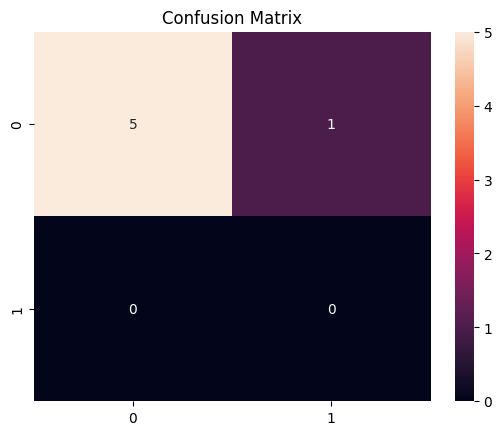

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.00      1.00      0.00         0

    accuracy                           0.83         6
   macro avg       0.50      0.92      0.45         6
weighted avg       1.00      0.83      0.91         6



In [9]:
# Dự đoán trên tập test
y_pred = classifier.predict(X_test)

# In ra confusion matrix
cm = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:\n', cm)

# Hiển thị confusion matrix bằng seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# In ra các chỉ số đánh giá mô hình
print('Classification Report:\n', classification_report(y_test, y_pred, zero_division=1))

<ipython-input-10-326cfeaa1a89>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


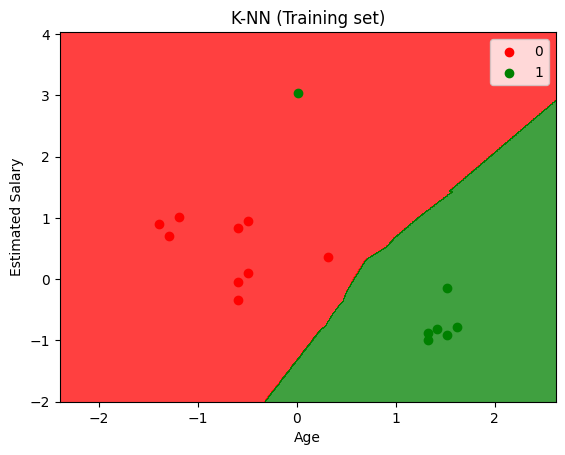

<ipython-input-10-326cfeaa1a89>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


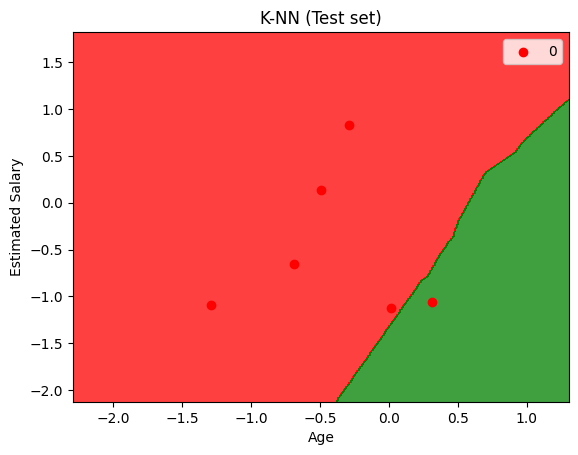

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a function to visualize the results
def visualize_results(X_set, y_set, set_description):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('K-NN (%s set)' % set_description)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

# Visualize the Training set results
visualize_results(X_train, y_train, 'Training')

# Visualize the Test set results
visualize_results(X_test, y_test, 'Test')